In [37]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [38]:
# Create engine using the .sqlite` database file
engine = create_engine("sqlite:///austinHousingData.sqlite")

In [39]:
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

austin_housing
-----------
zpid BIGINT
city TEXT
streetAddress TEXT
zipcode BIGINT
description TEXT
latitude FLOAT
longitude FLOAT
propertyTaxRate FLOAT
garageSpaces BIGINT
hasAssociation BOOLEAN
hasCooling BOOLEAN
hasGarage BOOLEAN
hasHeating BOOLEAN
hasSpa BOOLEAN
hasView BOOLEAN
homeType TEXT
parkingSpaces BIGINT
yearBuilt BIGINT
latestPrice FLOAT
numPriceChanges BIGINT
latest_saledate TEXT
latest_salemonth BIGINT
latest_saleyear BIGINT
latestPriceSource TEXT
numOfPhotos BIGINT
numOfAccessibilityFeatures BIGINT
numOfAppliances BIGINT
numOfParkingFeatures BIGINT
numOfPatioAndPorchFeatures BIGINT
numOfSecurityFeatures BIGINT
numOfWaterfrontFeatures BIGINT
numOfWindowFeatures BIGINT
numOfCommunityFeatures BIGINT
lotSizeSqFt FLOAT
livingAreaSqFt FLOAT
numOfPrimarySchools BIGINT
numOfElementarySchools BIGINT
numOfMiddleSchools BIGINT
numOfHighSchools BIGINT
avgSchoolDistance FLOAT
avgSchoolRating FLOAT
avgSchoolSize BIGINT
MedianStudentsPerTeacher BIGINT
numOfBathrooms FLOAT
numOfBedroom

In [55]:
# build the query
query = f"""
    SELECT
        homeType,
        hasGarage,
        hasCooling,
        hasHeating,
        hasSpa
    FROM
        austin_housing
    WHERE
        homeType != 'Vacant Land'
    ORDER BY
        homeType DESC;
"""

# execute query
df = pd.read_sql(text(query), con=engine)
df.head(10)

,homeType,hasGarage,hasCooling,hasHeating,hasSpa
0,Townhouse,0,1,1,0
1,Townhouse,0,1,1,0
2,Townhouse,1,1,1,0
3,Townhouse,0,1,1,0
4,Townhouse,0,1,1,0
5,Townhouse,0,1,1,0
6,Townhouse,1,1,1,0
7,Townhouse,1,1,1,0
8,Townhouse,1,1,1,0
9,Townhouse,0,1,1,0


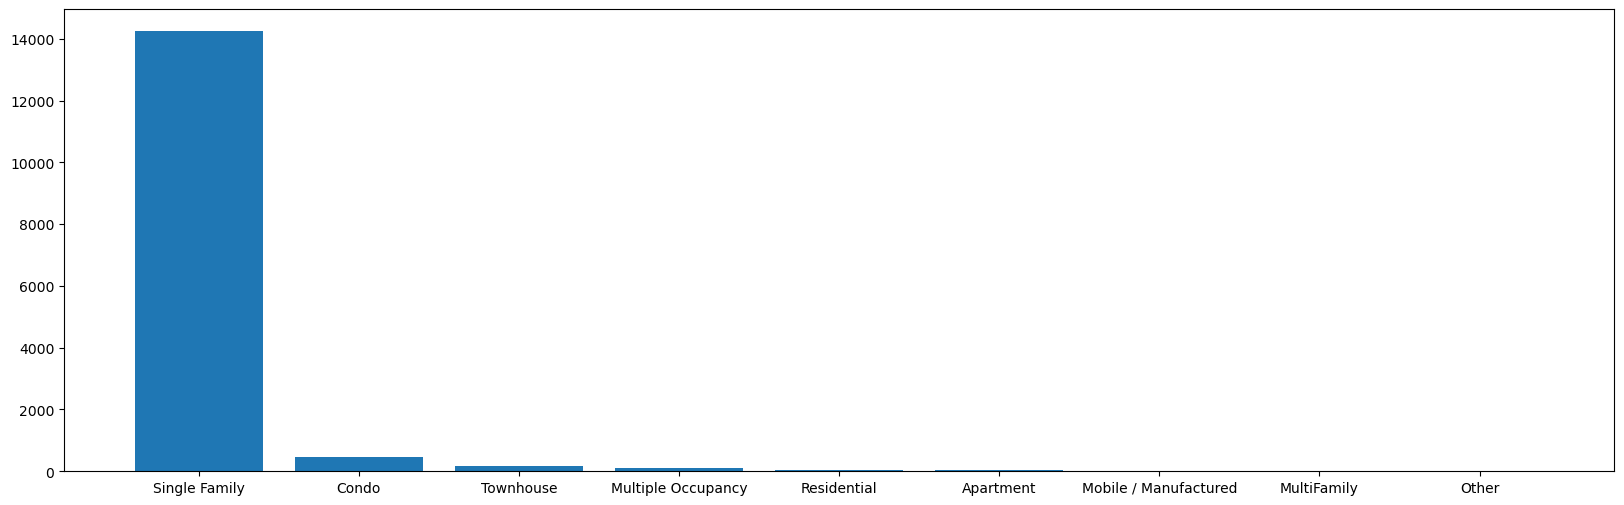

In [56]:
plt.figure(figsize=(20, 6))
plt.bar(df.homeType.value_counts().index, df.homeType.value_counts().values)
plt.show()

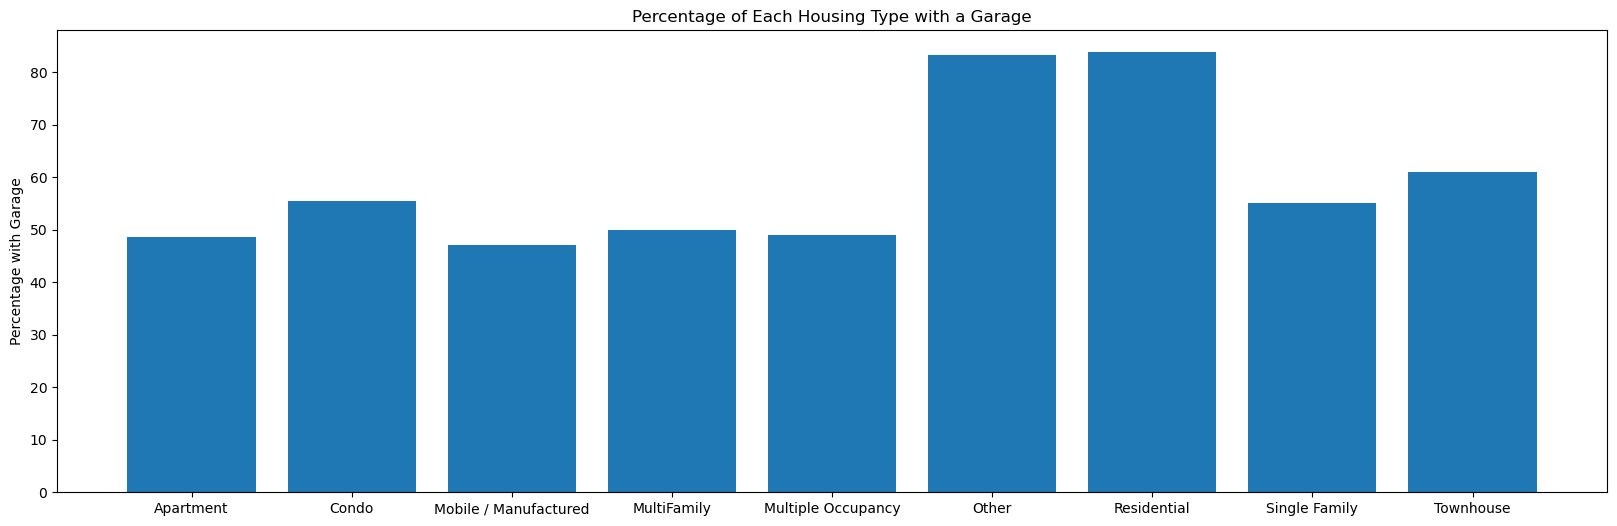

In [61]:
# build the query
query = f"""
    SELECT
        homeType
    FROM
        austin_housing
    WHERE
        hasGarage == TRUE
    AND
        homeType != 'Vacant Land'
    ORDER BY
        homeType DESC;
"""

# execute query
df_garage = pd.read_sql(text(query), con=engine)


total_counts = df['homeType'].value_counts()

# Calculate the count of each housing type that has a garage
garage_counts = df_garage['homeType'].value_counts()

# Calculate the percentage of each housing type that has a garage
percentages = (garage_counts / total_counts) * 100

plt.figure(figsize=(20, 6))
plt.bar(percentages.index, percentages.values)
plt.ylabel('Percentage with Garage')
plt.title('Percentage of Each Housing Type with a Garage')
plt.show()

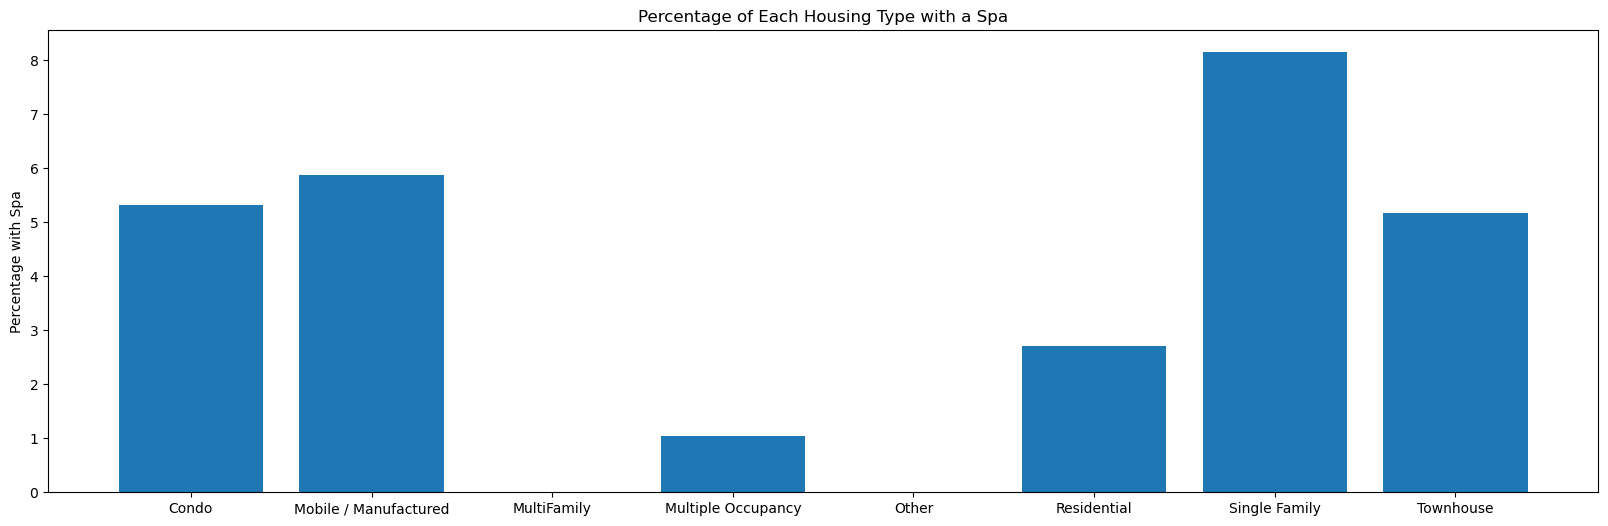

In [66]:
# build the query
query = f"""
    SELECT
        homeType
    FROM
        austin_housing
    WHERE
        hasSpa == TRUE
    AND
        homeType != 'Vacant Land'
    ORDER BY
        homeType DESC;
"""

# execute query
df_spa = pd.read_sql(text(query), con=engine)


total_counts = df['homeType'].value_counts()

# Calculate the count of each housing type that has a garage
spa_counts = df_spa['homeType'].value_counts()

# Calculate the percentage of each housing type that has a garage
percentages = (spa_counts / total_counts) * 100

plt.figure(figsize=(20, 6))
plt.bar(percentages.index, percentages.values)
plt.ylabel('Percentage with Spa')
plt.title('Percentage of Each Housing Type with a Spa')
plt.show()

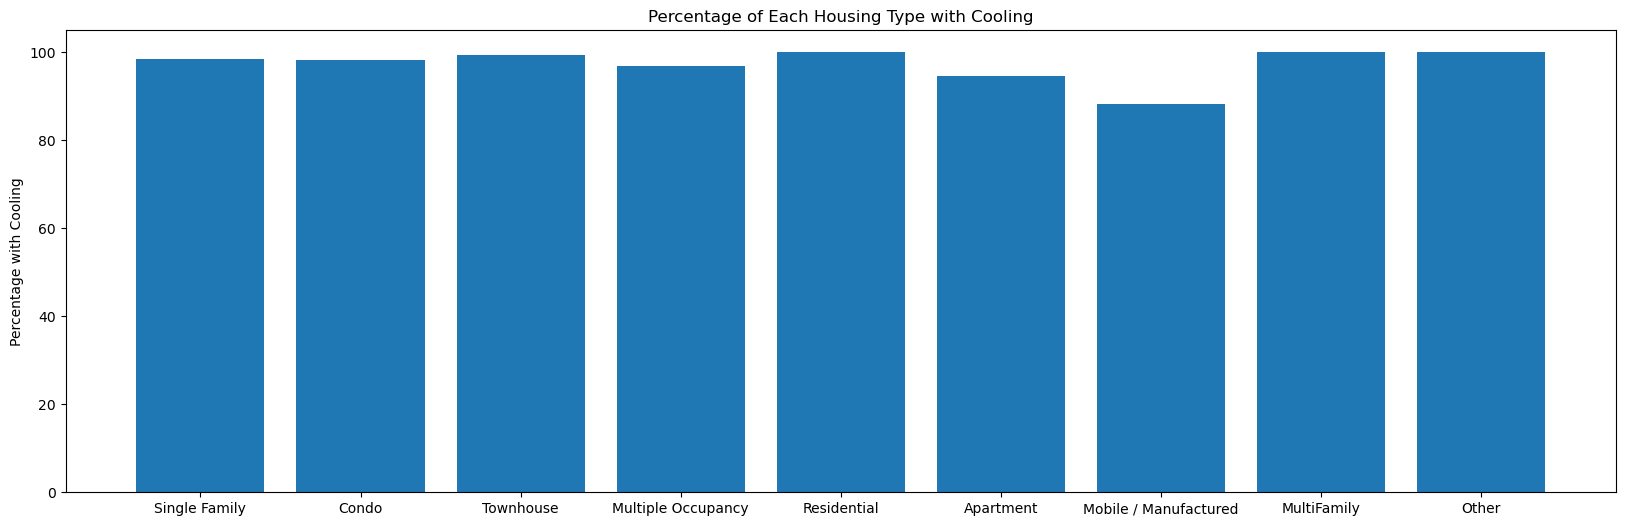

In [65]:
# build the query
query = f"""
    SELECT
        homeType
    FROM
        austin_housing
    WHERE
        hasCooling == TRUE
    AND
        homeType != 'Vacant Land'
    ORDER BY
        homeType DESC;
"""

# execute query
df_cooling = pd.read_sql(text(query), con=engine)


total_counts = df['homeType'].value_counts()

# Calculate the count of each housing type that has a garage
cooling_counts = df_cooling['homeType'].value_counts()

# Calculate the percentage of each housing type that has a garage
percentages = (cooling_counts / total_counts) * 100

plt.figure(figsize=(20, 6))
plt.bar(percentages.index, percentages.values)
plt.ylabel('Percentage with Cooling')
plt.title('Percentage of Each Housing Type with Cooling')
plt.show()

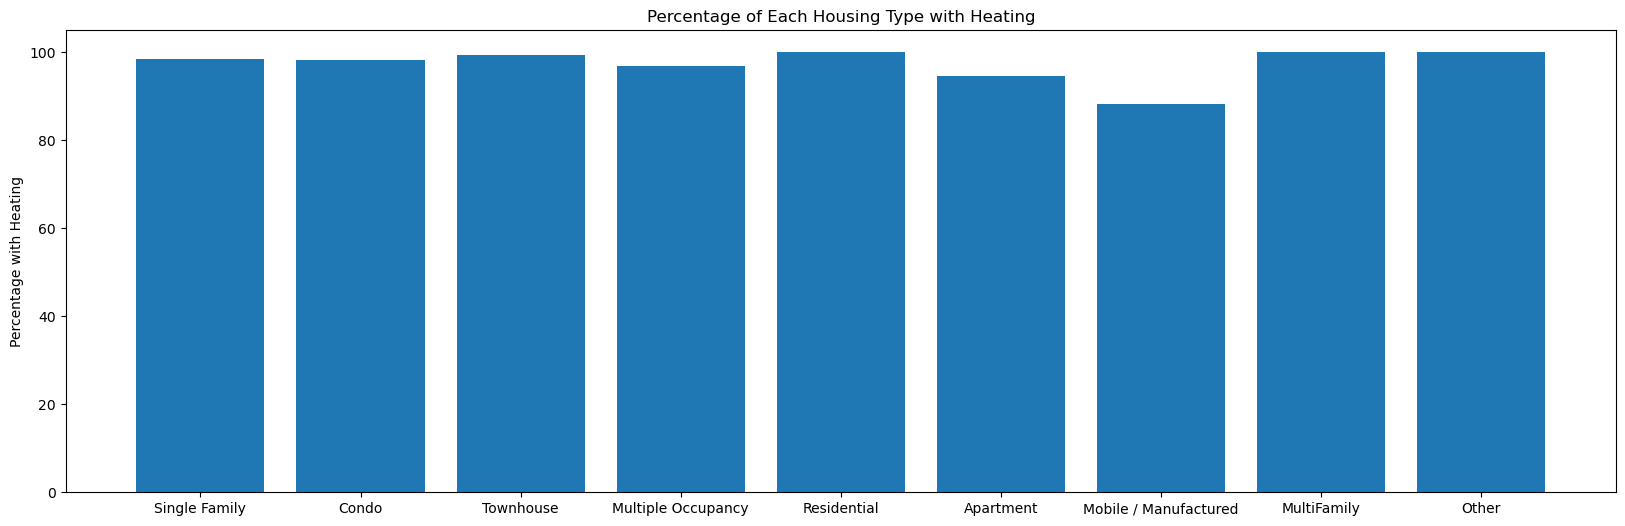

In [68]:
# build the query
query = f"""
    SELECT
        homeType
    FROM
        austin_housing
    WHERE
        hasHeating == TRUE
    AND
        homeType != 'Vacant Land'
    ORDER BY
        homeType DESC;
"""

# execute query
df_heating = pd.read_sql(text(query), con=engine)


total_counts = df['homeType'].value_counts()

# Calculate the count of each housing type that has a garage
heating_counts = df_cooling['homeType'].value_counts()

# Calculate the percentage of each housing type that has a garage
percentages = (heating_counts / total_counts) * 100

plt.figure(figsize=(20, 6))
plt.bar(percentages.index, percentages.values)
plt.ylabel('Percentage with Heating')
plt.title('Percentage of Each Housing Type with Heating')
plt.show()